## Creation of Borehole object

In [23]:
%matplotlib inline
import striplog
from striplog import Striplog, Legend, Lexicon, Interval, Component, Position
import pyvista as pv
import geopandas as gpd
import pandas as pd
import scipy

from utils import read_flat_files
from utils.db_tools import boreholes_dict_to_sqlite3_db, create_connection
import sqlite3
from sqlite3 import Error

import matplotlib.pyplot as plt
import numpy as np

In [57]:
#dfs['Intervals'].query('borehole=="F15"')
#dfs['Legend']

KeyError: 'Legend'

In [46]:
class  Borehole (): 
    def  __init__ ( self ): 
        print("Borehole created")
        
    #---------------------
    def build_strip_from_list(bh_name):
        Borehole.read_db_bh()
        bh_strip = []  # striplog object
        intervals = dfs['Intervals'].query(f'borehole=="{bh_name:s}"')[['top','base', 'description']]
        for row in intervals.iterrows():
            components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'
                                                 .format(borehole=bh_name, top=row[1]['top'], base=row[1]['base']))
            components_dict={}
            for r in components.iterrows():
                components_dict.update({r[1]['key']:r[1]['value']})
            bh_strip.append(Interval(**{'top': Position(middle=row[1]['top'], units='m'),
                                    'base': Position(middle=row[1]['base'], units='m'),
                                    'description': row[1]['description'], 
                                    'components': [Component(properties=components_dict)]}))
        return(bh_strip)
    #--------------------------
    def read_db_bh(database = r"project_database.db"):
        conn = create_connection(database)
        tables = ['Boreholes', 'Components', 'Intervals', 'Lexicon'] # table names in the database
        dfs = {}
        with conn:
            for i in tables:
                print(f"---{i:s} data--- ")
                sql_cmd = f"SELECT * FROM {i:s}" # to select the data of the table Boreholes
                dfs.update({i:  pd.read_sql(sql_cmd, conn)})
        return(dfs)
    
    def log_BH(bh_name):
        
        new_legend="legend_GSDMA.csv"  # A specific legend has been created which in is legend_GSDMA.csv
        my_legend = Legend.from_csv(filename=new_legend)
        legend = Legend.builtin('NSDOE')
        lexicon = Lexicon.default()
        
        strp1=Striplog(Borehole.build_strip_from_list(bh_name))
        strp1.plot(my_legend, ladder=True, aspect=2)
        my_legend.plot() 
     #--------------------------
    def triDim_BH(bh_name):
        print("")
    # list_boreholes, log_Boreholes, 
        
    def  parler (a): 
        print(f"j'ai été implanté {a}")
        
#forage = Borehole.parler(15)

In [43]:
print(dfs)

{'Boreholes':      id
0   F10
1   F11
2   F12
3   F13
4   F14
5   F15
6   F16
7   F20
8   F21
9   F22
10  F23
11  F24
12  F25
13  F10
14  F11
15  F12
16  F13
17  F14
18  F15
19  F16
20  F20
21  F21
22  F22
23  F23
24  F24
25  F25, 'Components':     borehole  top  base        key     value
0        F10  0.0   1.5  lithology  remblais
1        F10  0.0   1.5     colour    ocre\n
2        F10  1.5   4.0  lithology  remblais
3        F10  1.5   4.0     colour      ocre
4        F10  4.0   6.0  lithology      silt
..       ...  ...   ...        ...       ...
151      F25  0.0   1.5     colour      brun
152      F25  1.5   4.0  lithology  remblais
153      F25  1.5   4.0     colour      ocre
154      F25  4.0   6.0  lithology      silt
155      F25  4.0   6.0     colour      gris

[156 rows x 5 columns], 'Intervals':    borehole  top  base           description
0       F10  0.0   1.5  remblais non-saturés
1       F10  1.5   4.0      remblais saturés
2       F10  4.0   6.0             alluvio

---Boreholes data--- 
---Components data--- 
---Intervals data--- 
---Lexicon data--- 


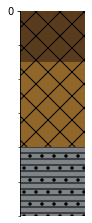

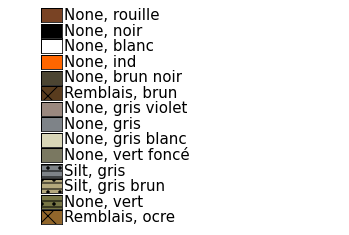

In [42]:
Borehole.log_BH("F10")

---Boreholes data--- 
---Components data--- 
---Intervals data--- 
---Lexicon data--- 


---Boreholes data--- 
---Components data--- 
---Intervals data--- 
---Lexicon data--- 


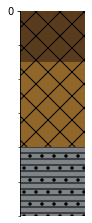

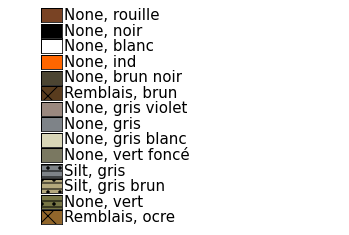

In [44]:
Borehole.log_BH('F25')

In [17]:
conn = create_connection(database)
tables = ['Boreholes', 'Components', 'Intervals', 'Lexicon'] # table names in the database
dfs = {}
with conn:
    for i in tables:
        print("---{table:s} data--- ".format(table=i))
        sql_cmd = "SELECT * FROM {table:s}".format(table=i) # to select the data of the table Boreholes
        dfs.update({i:  pd.read_sql(sql_cmd, conn)})

NameError: name 'create_connection' is not defined

In [22]:
dat_gdf = gpd.read_file("dat.gpkg")

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [23]:
dat_gdf

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (4.40947 50.41420)
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (4.40929 50.41417)
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (4.40935 50.41416)
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (4.40932 50.41419)
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (4.40938 50.41418)
...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (4.40935 50.41409)
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (4.40932 50.41408)
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (4.40933 50.41407)
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (4.40939 50.41409)
